##

## Setting Up the Environment 

## Install the necessary dependencies

In [5]:
pip install langchain openai chromadb pymupdf tiktoken

Note: you may need to restart the kernel to use updated packages.


## Importando as Bibliotecas para Leitura de PDF

In [3]:
import os
from langchain.document_loaders import PyMuPDFLoader

ModuleNotFoundError: No module named 'langchain'

In [ ]:
os.environ['OPENAI_API_KEY'] = 'sua_chave'

loader = PyMuPDFLoader("nome_do_arquivo.pdf")
documents = loader.load()

### Verificando o resultado - Debbuger

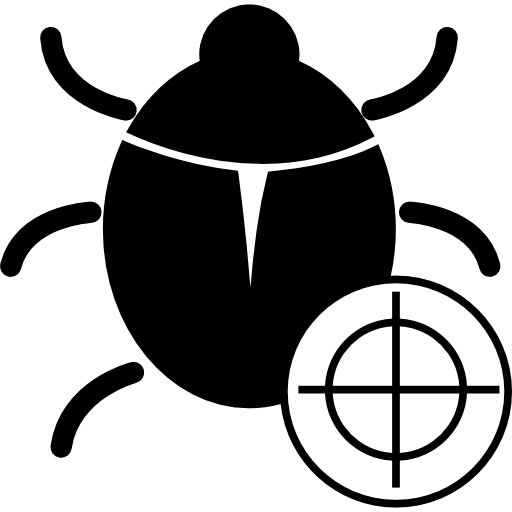

In [ ]:
documents

## Importando o Cortador de Texto - Text Splitter

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=512, chunk_overlap=10)
texts = text_splitter.split_documents(documents)

### Verificando o Resultado - Debbuger

In [ ]:
texts

## Embeddings

In [ ]:
from langchain.vectorstores import Chroma
from langchain.embeddings import OpenAIEmbeddings

In [ ]:
persist_directory = "./storage"

In [ ]:
persist_directory

In [ ]:
embeddings = OpenAIEmbeddings()

In [ ]:
embeddings

In [ ]:
vectordb = Chroma.from_documents(documents=texts, 
                                 embedding=embeddings,
                                 persist_directory=persist_directory)

vectordb.persist()

In [ ]:
vectordb

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import RetrievalQA

retriever = vectordb.as_retriever()
llm = ChatOpenAI(model_name='gpt-3.5-turbo-0301')
qa = RetrievalQA.from_chain_type(llm=llm, chain_type="stuff", retriever=retriever)

In [ ]:
while True:
        user_input = input("Enter a query: ")
        if user_input == "exit":
            break

        query = f"###Prompt {user_input}"
        try:
            llm_response = qa(query)
            print(llm_response["result"])
        except Exception as err:
            print('Exception occurred. Please try again', str(err))